# OpenAI's codex model for code generation
You can use OpenAI's codex model for code generation.

In [1]:
from bia_bob import bob
from skimage.io import imread
import stackview

In [2]:
bob.initialize(model="codex-mini-latest", vision_model="codex-mini-latest")

The codex model has vision capabilities. We just load a screenshot...

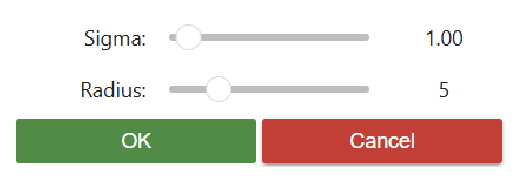

In [3]:
screenshot = imread("gui_screenshot.png")

stackview.imshow(screenshot)

... and pass this screenshot to bob, asking it to reimplement the shown interface.

In [4]:
%%bob screenshot
Build a user-interface similar to the given screenshot image.

I will create a simple interactive UI in a Jupyter environment using `ipywidgets` that matches the layout of the screenshot: two sliders (“Sigma” as a float slider, “Radius” as an integer slider) plus green “OK” and red “Cancel” buttons.



In [5]:
import ipywidgets as widgets
from IPython.display import display

# 1. Sigma slider (float with two-decimal readout)
sigma_slider = widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=10.0,
    step=0.01,
    description='Sigma:',
    readout_format='.2f',
    continuous_update=True,
)

# 2. Radius slider (integer)
radius_slider = widgets.IntSlider(
    value=5,
    min=0,
    max=20,
    step=1,
    description='Radius:',
    continuous_update=True,
)

# 3. OK and Cancel buttons
btn_ok = widgets.Button(description='OK', button_style='success')
btn_cancel = widgets.Button(description='Cancel', button_style='danger')

# 4. Layout sliders and buttons
ui = widgets.VBox([
    sigma_slider,
    radius_slider,
    widgets.HBox([btn_ok, btn_cancel], layout=widgets.Layout(gap='10px'))
])

# 5. Display the UI
display(ui)

The codex model can also be used to create image processing workflows as usual.

In [6]:
%%bob
load blobs.tif,
segment it and 
show the image and the resulting label image using an animated curtain

Load the “blobs.tif” image, segment it via a GPU‑accelerated Gaussian‑Otsu workflow, and then display the original image and the label image together using an animated curtain.




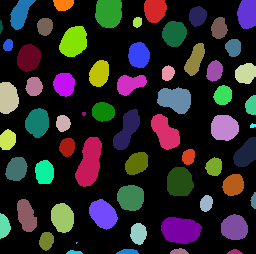

In [7]:
import pyclesperanto as cle

# 1. Load the image
image = imread('blobs.tif')

# 2. Segment via Gaussian‑Otsu labeling
labels = cle.gauss_otsu_labeling(image)

# 3. Show original and labels with an animated curtain
stackview.animate_curtain(image, labels)